## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tomo_encoders.misc import viewer
from tomo_encoders import DataFile
from scipy.ndimage import label, find_objects
from tifffile import imsave

In [2]:
Vp = DataFile('/data02/MyArchive/aisteer_3Dencoders/tmp_data/test_y_pred', tiff = True).read_full()
Vx = DataFile('/data02/MyArchive/aisteer_3Dencoders/tmp_data/test_x_rec', tiff = True).read_full()


##################################################
Found existing tiff folder: test_y_pred
Dataset shape: (896, 2176, 2176)

##################################################
Found existing tiff folder: test_x_rec
Dataset shape: (896, 2176, 2176)


In [3]:
imx = viewer.get_orthoplanes(vol = Vx)
imp = viewer.get_orthoplanes(vol = Vp)

In [4]:
lab_arr, n_objs = label(Vp)
p_obj = find_objects(lab_arr)
idx_biggest_void= lab_arr[448,1150,1250]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

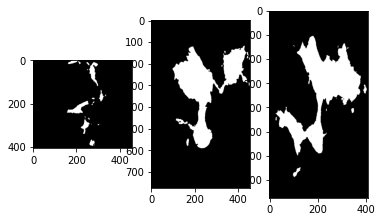

In [5]:
viewer.view_midplanes(lab_arr[p_obj[idx_biggest_void-1]] == idx_biggest_void)

In [6]:
v = lab_arr[p_obj[7215]] == 7216
r = Vx[p_obj[7215]]

In [7]:
imsave('/home/atekawade/Dropbox/Arg/transfers/tmp/vol_bin.tiff', data = v.astype(np.uint8))

In [8]:
imsave('/home/atekawade/Dropbox/Arg/transfers/tmp/vol_rec.tiff', data = r)